In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv("D:/Labs/Pulsar.csv",sep=",")
df.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


<AxesSubplot:>

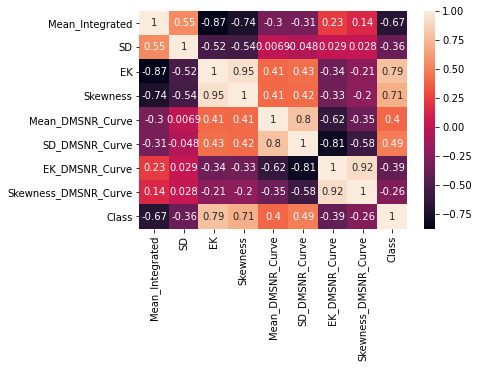

In [3]:
correlation = df.corr()
sns.heatmap(correlation,annot=True)

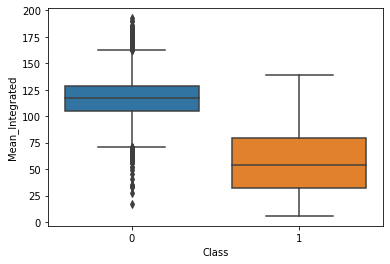

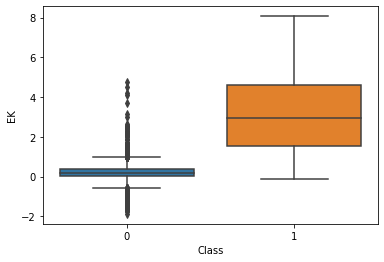

In [4]:
sns.boxplot(x="Class", y="Mean_Integrated", data=df)
plt.show()
sns.boxplot(x="Class", y="EK", data=df)
plt.show()

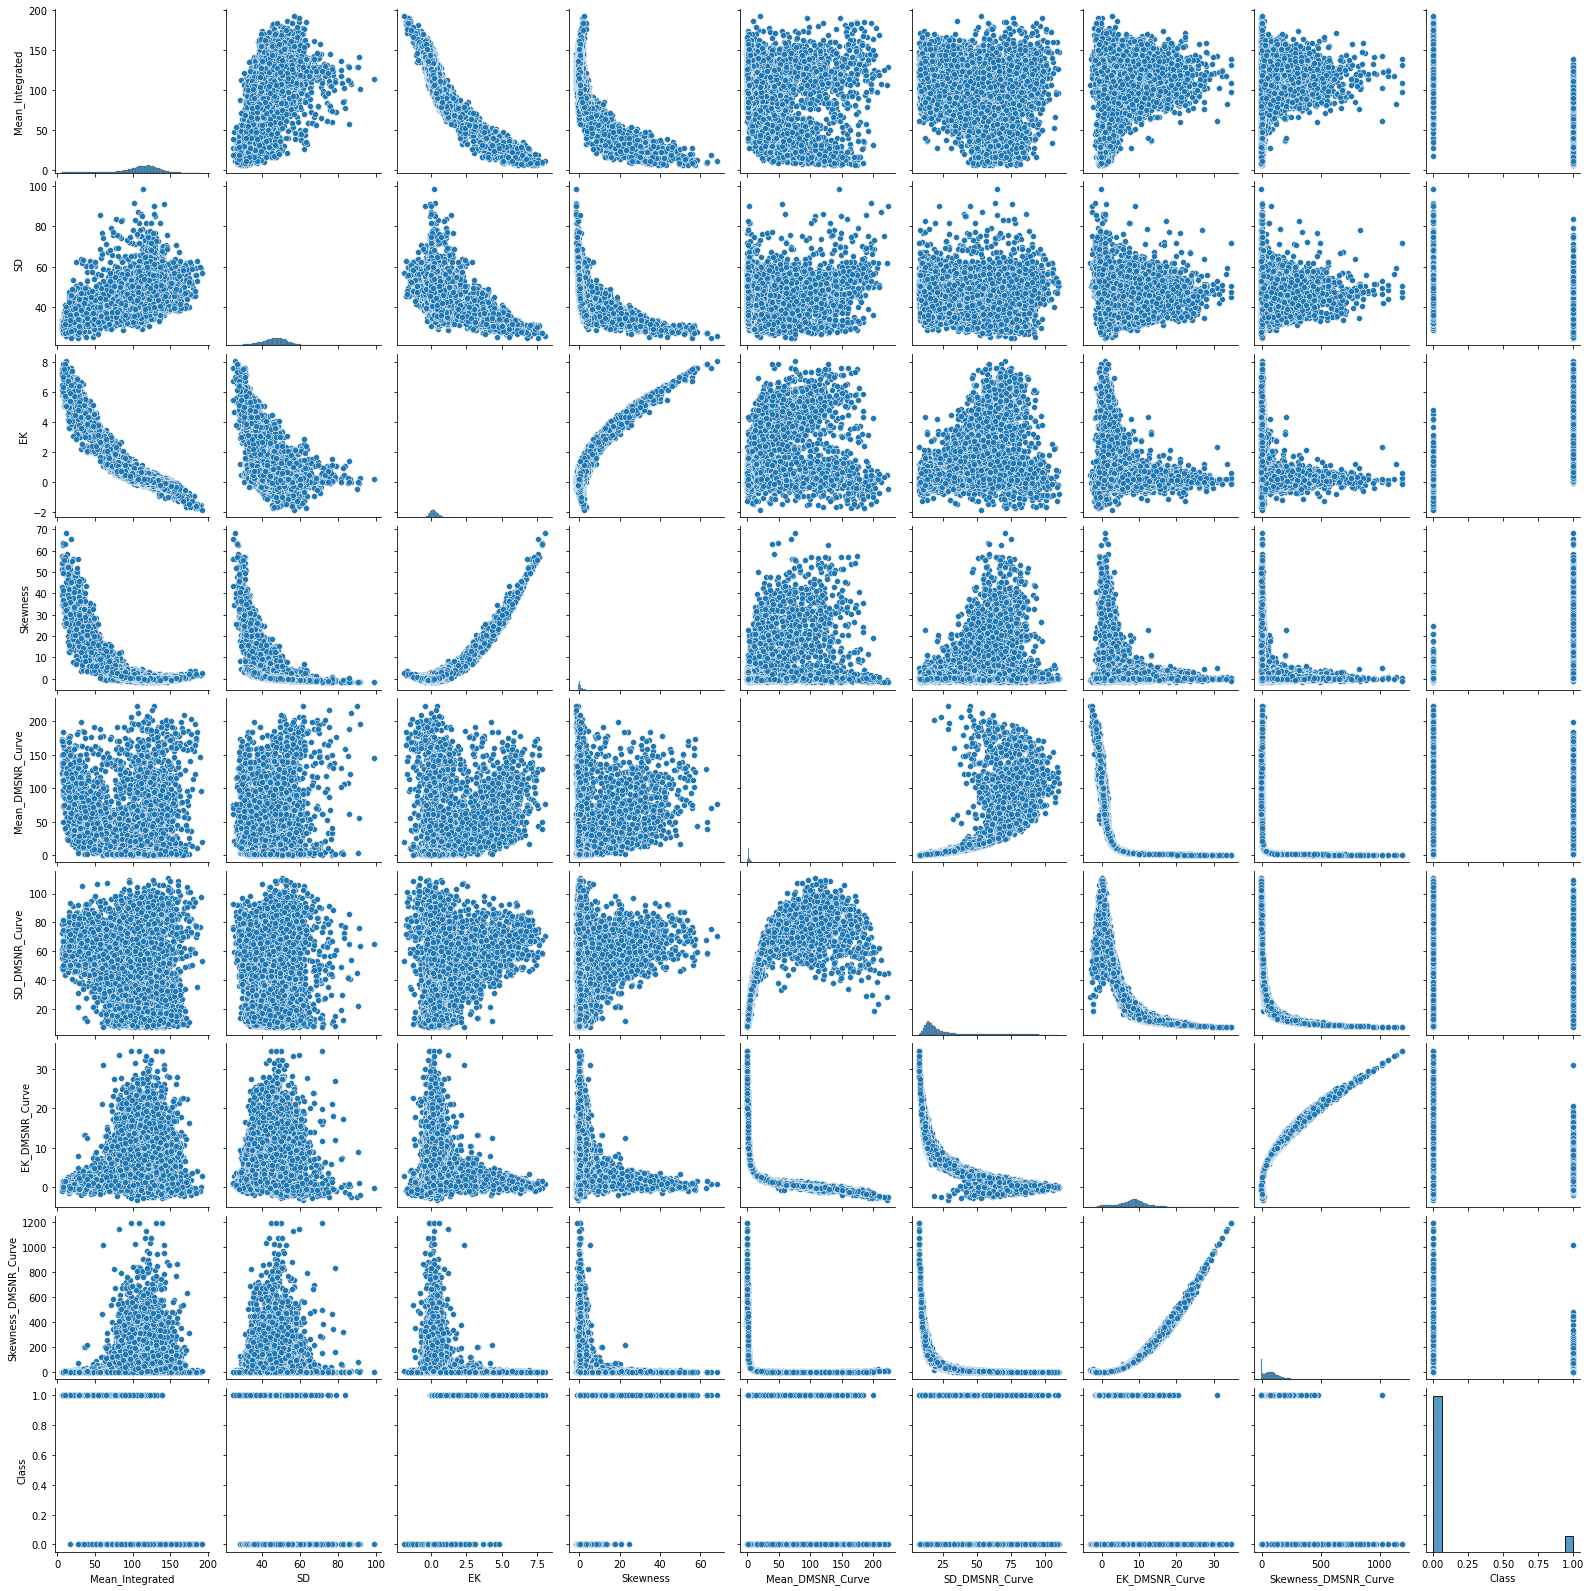

In [5]:
sns.pairplot(df)

In [6]:
minMaxScaler = MinMaxScaler()
scaledColums = pd.DataFrame(minMaxScaler.fit_transform(df))
scaledColums

,0,1,2,3,4,5,6,7,8
0,0.721342,0.417687,0.165043,0.015627,0.013382,0.113681,0.294986,0.063890,0.0
1,0.517628,0.460908,0.235415,0.018268,0.006560,0.072524,0.364015,0.108443,0.0
2,0.520346,0.196868,0.221138,0.040677,0.013030,0.139188,0.288624,0.054610,0.0
3,0.700933,0.437884,0.181750,0.016534,0.015368,0.131583,0.266348,0.046581,0.0
4,0.443854,0.214847,0.249044,0.041712,0.004327,0.039684,0.462029,0.213369,0.0
...,...,...,...,...,...,...,...,...,...
17893,0.699218,0.473948,0.169741,0.015077,0.004855,0.046437,0.493364,0.241336,0.0
17894,0.624942,0.333936,0.201496,0.030260,0.072572,0.360761,0.161482,0.008612,0.0
17895,0.607712,0.475144,0.204652,0.015007,0.095069,0.498699,0.149653,0.005509,0.0
17896,0.581866,0.393617,0.208855,0.025283,0.007766,0.058209,0.348926,0.114181,0.0


In [7]:
target = [8]
features = scaledColums.columns.drop(target)
train,test = train_test_split(scaledColums,test_size = 0.33)
x_train = train[features]
y_train = train[target]
x_test  = test[features]
y_test = test[target]

In [8]:
KNN_class = KNeighborsClassifier(n_neighbors=4) 
KNN_class.fit(x_train,y_train.values.ravel())
y_pred= KNN_class.predict(x_test)
accuracy_score(y_test,y_pred)

0.9774843406128322

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      5373
         1.0       0.93      0.81      0.87       534

    accuracy                           0.98      5907
   macro avg       0.96      0.90      0.93      5907
weighted avg       0.98      0.98      0.98      5907



<AxesSubplot:>

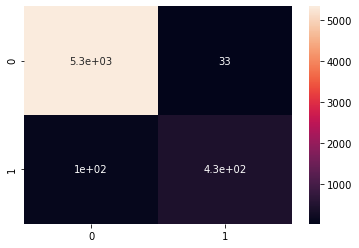

In [9]:
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [10]:
param_grid ={'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
KNN_class = KNeighborsClassifier() 
grid_search=GridSearchCV(KNN_class, param_grid, return_train_score=True)
grid_search.fit(x_train, y_train.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.9777332159180865
The best parameters are:
 KNeighborsClassifier()


In [11]:
DT_class = DecisionTreeClassifier()
DT_class.fit(x_train,y_train.values.ravel())
y_pred= DT_class.predict(x_test)
accuracy_score(y_test,y_pred)

0.967834772304046

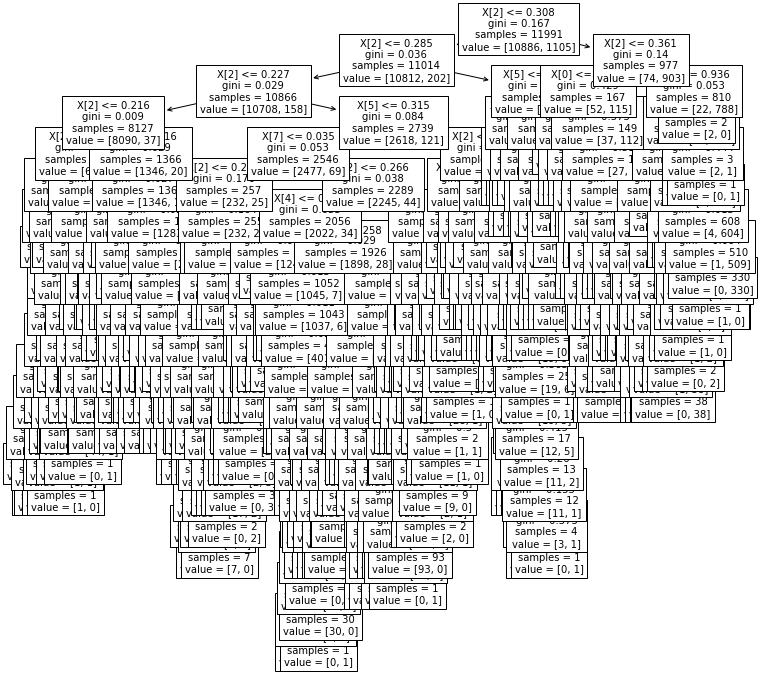

In [12]:
plt.figure(figsize=(12,12))
plot_tree(DT_class, fontsize=10)
plt.show()

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      5373
         1.0       0.81      0.84      0.83       534

    accuracy                           0.97      5907
   macro avg       0.90      0.91      0.90      5907
weighted avg       0.97      0.97      0.97      5907



<AxesSubplot:>

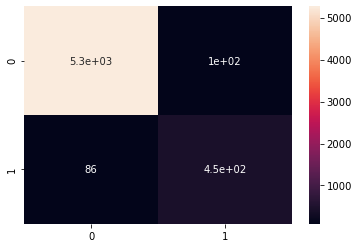

In [13]:
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [14]:
param_grid ={'max_depth': [4,5,6,7,8,9,19,11,12,13,14,15]}
DT_class = DecisionTreeClassifier()
grid_search=GridSearchCV(DT_class, param_grid, return_train_score=True)
grid_search.fit(x_train, y_train.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.9776501955047296
The best parameters are:
 DecisionTreeClassifier(max_depth=5)


In [15]:
SVC_class = SVC()
SVC_class.fit(x_train,y_train.values.ravel())
y_pred= SVC_class.predict(x_test)
accuracy_score(y_test,y_pred)

0.9800237006940917

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      5373
         1.0       0.95      0.82      0.88       534

    accuracy                           0.98      5907
   macro avg       0.97      0.91      0.94      5907
weighted avg       0.98      0.98      0.98      5907



<AxesSubplot:>

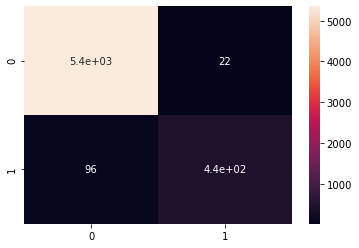

In [16]:
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [17]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
SVC_clsfr = SVC()
grid_search = GridSearchCV(SVC_clsfr, param_grid, return_train_score=True)
grid_search.fit(x_train, y_train.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.9794013421633492
The best parameters are:
 SVC(C=1000, gamma=0.1)


In [18]:
AdaBoost_class = AdaBoostClassifier()
AdaBoost_class.fit(x_train,y_train.values.ravel())
y_pred= AdaBoost_class.predict(x_test)
accuracy_score(y_test,y_pred)

0.9808701540545116

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      5373
         1.0       0.94      0.85      0.89       534

    accuracy                           0.98      5907
   macro avg       0.96      0.92      0.94      5907
weighted avg       0.98      0.98      0.98      5907



<AxesSubplot:>

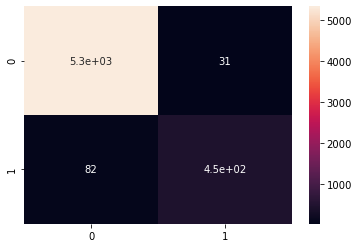

In [19]:
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [21]:
param_grid={'n_estimators':[200,500,1000],'learning_rate':[0.001,0.01,0.1]}
AdaBoost_class = AdaBoostClassifier()
grid_search=GridSearchCV(AdaBoost_class, param_grid,return_train_score=True)
grid_search.fit(x_train, y_train.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.9788176961418105
The best parameters are:
 AdaBoostClassifier(learning_rate=0.1, n_estimators=1000)


In [22]:
RF_class = RandomForestClassifier()
RF_class.fit(x_train,y_train.values.ravel())
y_pred= RF_class.predict(x_test)
accuracy_score(y_test,y_pred)

0.9810394447265955

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5373
         1.0       0.93      0.85      0.89       534

    accuracy                           0.98      5907
   macro avg       0.96      0.92      0.94      5907
weighted avg       0.98      0.98      0.98      5907



<AxesSubplot:>

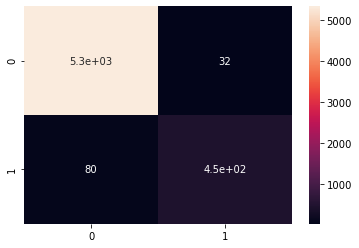

In [23]:
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [24]:
param_grid ={'max_depth': [4,5,6,7,8,9,19,11,12,13,14,15], 'n_estimators': [50, 100, 200]}
RF_class = RandomForestClassifier()
grid_search=GridSearchCV(RF_class, param_grid,return_train_score=True)
grid_search.fit(x_train, y_train.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.9798183215761641
The best parameters are:
 RandomForestClassifier(max_depth=13)
